In [1]:
# Automatically reload modules after executing each cell.
%load_ext autoreload
%autoreload 2

In [37]:
# General imports
import os
import tensorflow as tf
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier
from joblib import dump, load 

# Utility imports
from utils.losses import *
from utils.plotting import *
from utils.training import *

np.random.seed(666) # Need to do more to ensure data is the same across runs.

w = 3.5
h = 3.25              # Plots have dimension (w,h)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# $d = 1$

In [24]:
# Experiment parameters
num = 0
reps = 100
d = 1
Ns = 10**np.arange(2, 8)

# Model parameters
bce_params = {'loss':bce, 'd': d}

filestr = 'models/trees/{}/set_{}/'.format(d, num)
bce_filestr = filestr + 'bce/model_{}_{}.h5'
bdt_filestr = filestr + 'bdt/model_{}.h5'
gbc_filestr = filestr + 'gbc/model_{}_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'bce/'):
    os.mkdir(filestr + 'bce/')
    
if not os.path.isdir(filestr + 'bdt/'):
    os.mkdir(filestr + 'bdt/')
    
if not os.path.isdir(filestr + 'gbc/'):
    os.mkdir(filestr + 'gbc/')

# Data parameters
X = np.load('data/trees/{}/X_trn.npy'.format(d)).reshape(-1, 1)
y = np.load('data/trees/{}/y_trn.npy'.format(d)).astype('float32')

bkgd = stats.norm(-0.1, 1)
sgnl = stats.norm(+0.1, 1)

lr = make_lr(bkgd, sgnl)

In [14]:
N = 10**6
data, m, s = split_data(X[:N], y[:N])

bce_lrs = [None] * reps
gbc_lrs = [None] * reps
for i in range(reps):
    print(i, end = ' ')
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(N, i))
    bce_lrs[i] = odds_lr(bce_model, m, s)

    gbc_model = load(gbc_filestr.format(N, i))
    gbc_lrs[i] = tree_lr(gbc_model)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [15]:
xs = np.linspace(-6, 6, 1201).reshape(-1, 1)

In [16]:
bce_preds = get_preds(bce_lrs, xs)

In [17]:
gbc_preds = get_preds(gbc_lrs, xs)

In [21]:
avg_bce = bce_preds.mean(axis = 0)
avg_gbc = gbc_preds.mean(axis = 0)

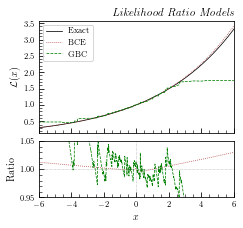

In [40]:
ratio_plot([bce_preds, gbc_preds], ['BCE', 'GBC'], lr, xs.reshape(-1), 
           figsize = (w, h), title = '\it Likelihood Ratio Models', 
           filename = 'plots/lr_models.png') 

# $d = 2$

In [ ]:
# Experiment parameters
num = 0
reps = 100
d = 2
Ns = 10**np.arange(2, 8)

# Model parameters
bce_params = {'loss':bce, 'd': d}

filestr = 'models/trees/{}/set_{}/'.format(d, num)
bce_filestr = filestr + 'bce/model_{}_{}.h5'
bdt_filestr = filestr + 'bdt/model_{}.h5'
gbc_filestr = filestr + 'gbc/model_{}_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'bce/'):
    os.mkdir(filestr + 'bce/')
    
if not os.path.isdir(filestr + 'bdt/'):
    os.mkdir(filestr + 'bdt/')
    
if not os.path.isdir(filestr + 'gbc/'):
    os.mkdir(filestr + 'gbc/')

# Data parameters
X = np.load('data/trees/{}/X_trn.npy'.format(d))
y = np.load('data/trees/{}/y_trn.npy'.format(d)).astype('float32')

In [ ]:
for N in Ns:
    print('===================================================\n{}'.format(N))
    # Take the first N samples.
    data, m, s = split_data(X[:N], y[:N])
    
    # Train BDT model (only need to train 1)
    #bdt_model = XGBClassifier(early_stopping_rounds = 10)
    #X_trn, X_vld, y_trn, y_vld = data
    #bdt_model.fit(X_trn, y_trn, eval_set = [(X_vld, y_vld)], verbose = 0)
    #trace = bdt_model.evals_result()['validation_0']
    #print(trace['logloss'][-1], '\t', len(trace['logloss']), end = '\n')
    #bdt_model.save_model(bdt_filestr.format(N))

    for i in range(reps):
        print(i, end = ' ')
        # Train BCE model
        #bce_model, trace = train(data, **bce_params)
        #bce_model.save_weights(bce_filestr.format(N, i))
        
        # Train GBC model
        gbc_model = GradientBoostingClassifier(validation_fraction = 0.25,
                                               n_iter_no_change = 10)
        gbc_model.fit(X[:N], y[:N])
        dump(gbc_model, gbc_filestr.format(N, i))
    print()

# $d=4$

In [4]:
# Experiment parameters
num = 0
reps = 100
d = 4
Ns = 10**np.arange(2, 8)

# Model parameters
bce_params = {'loss':bce, 'd': d}

filestr = 'models/trees/{}/set_{}/'.format(d, num)
bce_filestr = filestr + 'bce/model_{}_{}.h5'
bdt_filestr = filestr + 'bdt/model_{}.h5'
gbc_filestr = filestr + 'gbc/model_{}_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'bce/'):
    os.mkdir(filestr + 'bce/')
    
if not os.path.isdir(filestr + 'bdt/'):
    os.mkdir(filestr + 'bdt/')
    
if not os.path.isdir(filestr + 'gbc/'):
    os.mkdir(filestr + 'gbc/')

# Data parameters
X = np.load('data/trees/{}/X_trn.npy'.format(d))
y = np.load('data/trees/{}/y_trn.npy'.format(d)).astype('float32')

In [ ]:
for N in Ns:
    print('===================================================\n{}'.format(N))
    # Take the first N samples.
    data, m, s = split_data(X[:N], y[:N])
    
    # Train BDT model (only need to train 1)
    #bdt_model = XGBClassifier(early_stopping_rounds = 10)
    #X_trn, X_vld, y_trn, y_vld = data
    #bdt_model.fit(X_trn, y_trn, eval_set = [(X_vld, y_vld)], verbose = 0)
    #trace = bdt_model.evals_result()['validation_0']
    #print(trace['logloss'][-1], '\t', len(trace['logloss']), end = '\n')
    #bdt_model.save_model(bdt_filestr.format(N))

    for i in range(91, reps):
        print(i, end = ' ')
        # Train BCE model
        #bce_model, trace = train(data, **bce_params)
        #bce_model.save_weights(bce_filestr.format(N, i))
        
        # Train GBC model
        gbc_model = GradientBoostingClassifier(validation_fraction = 0.25,
                                               n_iter_no_change = 10)
        gbc_model.fit(X[:N], y[:N])
        dump(gbc_model, gbc_filestr.format(N, i))
    print()

10000000
48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 

# $d=8$

In [ ]:
# Experiment parameters
num = 0
reps = 100
d = 8
Ns = 10**np.arange(2, 8)

# Model parameters
bce_params = {'loss':bce, 'd': d}

filestr = 'models/trees/{}/set_{}/'.format(d, num)
bce_filestr = filestr + 'bce/model_{}_{}.h5'
bdt_filestr = filestr + 'bdt/model_{}.h5'
gbc_filestr = filestr + 'gbc/model_{}_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'bce/'):
    os.mkdir(filestr + 'bce/')
    
if not os.path.isdir(filestr + 'bdt/'):
    os.mkdir(filestr + 'bdt/')
    
if not os.path.isdir(filestr + 'gbc/'):
    os.mkdir(filestr + 'gbc/')

# Data parameters
X = np.load('data/trees/{}/X_trn.npy'.format(d))
y = np.load('data/trees/{}/y_trn.npy'.format(d)).astype('float32')

In [ ]:
for N in Ns:
    print('===================================================\n{}'.format(N))
    # Take the first N samples.
    data, m, s = split_data(X[:N], y[:N])
    
    # Train BDT model (only need to train 1)
    #bdt_model = XGBClassifier(early_stopping_rounds = 10)
    #X_trn, X_vld, y_trn, y_vld = data
    #bdt_model.fit(X_trn, y_trn, eval_set = [(X_vld, y_vld)], verbose = 0)
    #trace = bdt_model.evals_result()['validation_0']
    #print(trace['logloss'][-1], '\t', len(trace['logloss']), end = '\n')
    #bdt_model.save_model(bdt_filestr.format(N))

    for i in range(reps):
        print(i, end = ' ')
        # Train BCE model
        #bce_model, trace = train(data, **bce_params)
        #bce_model.save_weights(bce_filestr.format(N, i))
        
        # Train GBC model
        gbc_model = GradientBoostingClassifier(validation_fraction = 0.25,
                                               n_iter_no_change = 10)
        gbc_model.fit(X[:N], y[:N])
        dump(gbc_model, gbc_filestr.format(N, i))
    print()

# $d=16$

In [ ]:
# Experiment parameters
num = 0
reps = 100
d = 16
Ns = 10**np.arange(2, 8)

# Model parameters
bce_params = {'loss':bce, 'd': d}

filestr = 'models/trees/{}/set_{}/'.format(d, num)
bce_filestr = filestr + 'bce/model_{}_{}.h5'
bdt_filestr = filestr + 'bdt/model_{}.h5'
gbc_filestr = filestr + 'gbc/model_{}_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'bce/'):
    os.mkdir(filestr + 'bce/')
    
if not os.path.isdir(filestr + 'bdt/'):
    os.mkdir(filestr + 'bdt/')
    
if not os.path.isdir(filestr + 'gbc/'):
    os.mkdir(filestr + 'gbc/')

# Data parameters
X = np.load('data/trees/{}/X_trn.npy'.format(d))
y = np.load('data/trees/{}/y_trn.npy'.format(d)).astype('float32')

In [ ]:
for N in Ns:
    print('===================================================\n{}'.format(N))
    # Take the first N samples.
    data, m, s = split_data(X[:N], y[:N])
    
    # Train BDT model (only need to train 1)
    #bdt_model = XGBClassifier(early_stopping_rounds = 10)
    #X_trn, X_vld, y_trn, y_vld = data
    #bdt_model.fit(X_trn, y_trn, eval_set = [(X_vld, y_vld)], verbose = 0)
    #trace = bdt_model.evals_result()['validation_0']
    #print(trace['logloss'][-1], '\t', len(trace['logloss']), end = '\n')
    #bdt_model.save_model(bdt_filestr.format(N))

    for i in range(reps):
        print(i, end = ' ')
        # Train BCE model
        #bce_model, trace = train(data, **bce_params)
        #bce_model.save_weights(bce_filestr.format(N, i))
        
        # Train GBC model
        gbc_model = GradientBoostingClassifier(validation_fraction = 0.25,
                                               n_iter_no_change = 10)
        gbc_model.fit(X[:N], y[:N])
        dump(gbc_model, gbc_filestr.format(N, i))
    print()

# $d = 32$

In [ ]:
# Experiment parameters
num = 0
reps = 100
d = 32
Ns = 10**np.arange(2, 8)

# Model parameters
bce_params = {'loss':bce, 'd': d}

filestr = 'models/trees/{}/set_{}/'.format(d, num)
bce_filestr = filestr + 'bce/model_{}_{}.h5'
bdt_filestr = filestr + 'bdt/model_{}.h5'
gbc_filestr = filestr + 'gbc/model_{}_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'bce/'):
    os.mkdir(filestr + 'bce/')
    
if not os.path.isdir(filestr + 'bdt/'):
    os.mkdir(filestr + 'bdt/')
    
if not os.path.isdir(filestr + 'gbc/'):
    os.mkdir(filestr + 'gbc/')

# Data parameters
X = np.load('data/trees/{}/X_trn.npy'.format(d))
y = np.load('data/trees/{}/y_trn.npy'.format(d)).astype('float32')

In [ ]:
for N in Ns:
    print('===================================================\n{}'.format(N))
    # Take the first N samples.
    data, m, s = split_data(X[:N], y[:N])
    
    # Train BDT model (only need to train 1)
    #bdt_model = XGBClassifier(early_stopping_rounds = 10)
    #X_trn, X_vld, y_trn, y_vld = data
    #bdt_model.fit(X_trn, y_trn, eval_set = [(X_vld, y_vld)], verbose = 0)
    #trace = bdt_model.evals_result()['validation_0']
    #print(trace['logloss'][-1], '\t', len(trace['logloss']), end = '\n')
    #bdt_model.save_model(bdt_filestr.format(N))

    for i in range(reps):
        print(i, end = ' ')
        # Train BCE model
        #bce_model, trace = train(data, **bce_params)
        #bce_model.save_weights(bce_filestr.format(N, i))
        
        # Train GBC model
        gbc_model = GradientBoostingClassifier(validation_fraction = 0.25,
                                               n_iter_no_change = 10)
        gbc_model.fit(X[:N], y[:N])
        dump(gbc_model, gbc_filestr.format(N, i))
    print()